In [3]:
import os
import sys
import numpy as np
import pandas as pd
import igraph as ig
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_settings_v3 import *
from plot_auxiliary import *
from planar import create_proximity_graph
from auxiliary import getLinearReg

%matplotlib inline

net_type = 'DT'
param = 'param'

net_dir = os.path.join('..', 'networks', net_type)

### **Fig. 1 from Fan (2020)**

In [4]:
if False:
    net_type = 'ER'
    param = '3.50'
    attack = 'Ran'
else:
    net_type = 'DT'
    param = 'param'
    attack = 'BtwU'

#sizes = [128, 256, 512, 1024]#, 2048, 4096, 8192]#, 16384]
sizes = [512, 1024, 2048, 4096, 8192, 16384]
all_mean_values = []
all_std_values = []
fluctuations = {}
for i, N in enumerate(sizes):
    print(N)
    nseeds = nseeds_per_size[N]
    delta_values = load_delta(net_type, N, param, attack)
    delta_values[:,2] = delta_values[:,2]*N
    mean_values = delta_values.mean(axis=0)
    
    #std_values = np.sqrt(((delta_values**2).mean(axis=0) - delta_values.mean(axis=0)**2))
    std_values = delta_values.std(axis=0)
    
    all_mean_values.append(mean_values)
    all_std_values.append(std_values)
    
    fluctuations[N] = delta_values - mean_values
    
all_mean_values = np.array(all_mean_values)
all_std_values = np.array(all_std_values)
print(all_mean_values)
print(all_std_values)

512
1024
2048
4096
8192
16384
[[5.92548828e-02 3.90294336e-01 4.74001700e+02]
 [4.77549805e-02 3.96196289e-01 9.59739400e+02]
 [3.87534668e-02 4.02631348e-01 1.94038200e+03]
 [3.18780065e-02 4.07948826e-01 3.91346699e+03]
 [2.63262447e-02 4.15679742e-01 7.90654244e+03]
 [2.18761089e-02 4.14305494e-01 1.58822725e+04]]
[[1.12030266e-02 5.99590746e-02 3.39894292e+01]
 [8.48407009e-03 5.89220343e-02 6.68960798e+01]
 [6.60435612e-03 5.73958031e-02 1.28085291e+02]
 [5.16236344e-03 5.58513918e-02 2.44515774e+02]
 [3.91051912e-03 5.14709204e-02 4.04450830e+02]
 [3.25977253e-03 5.44007064e-02 8.03288366e+02]]


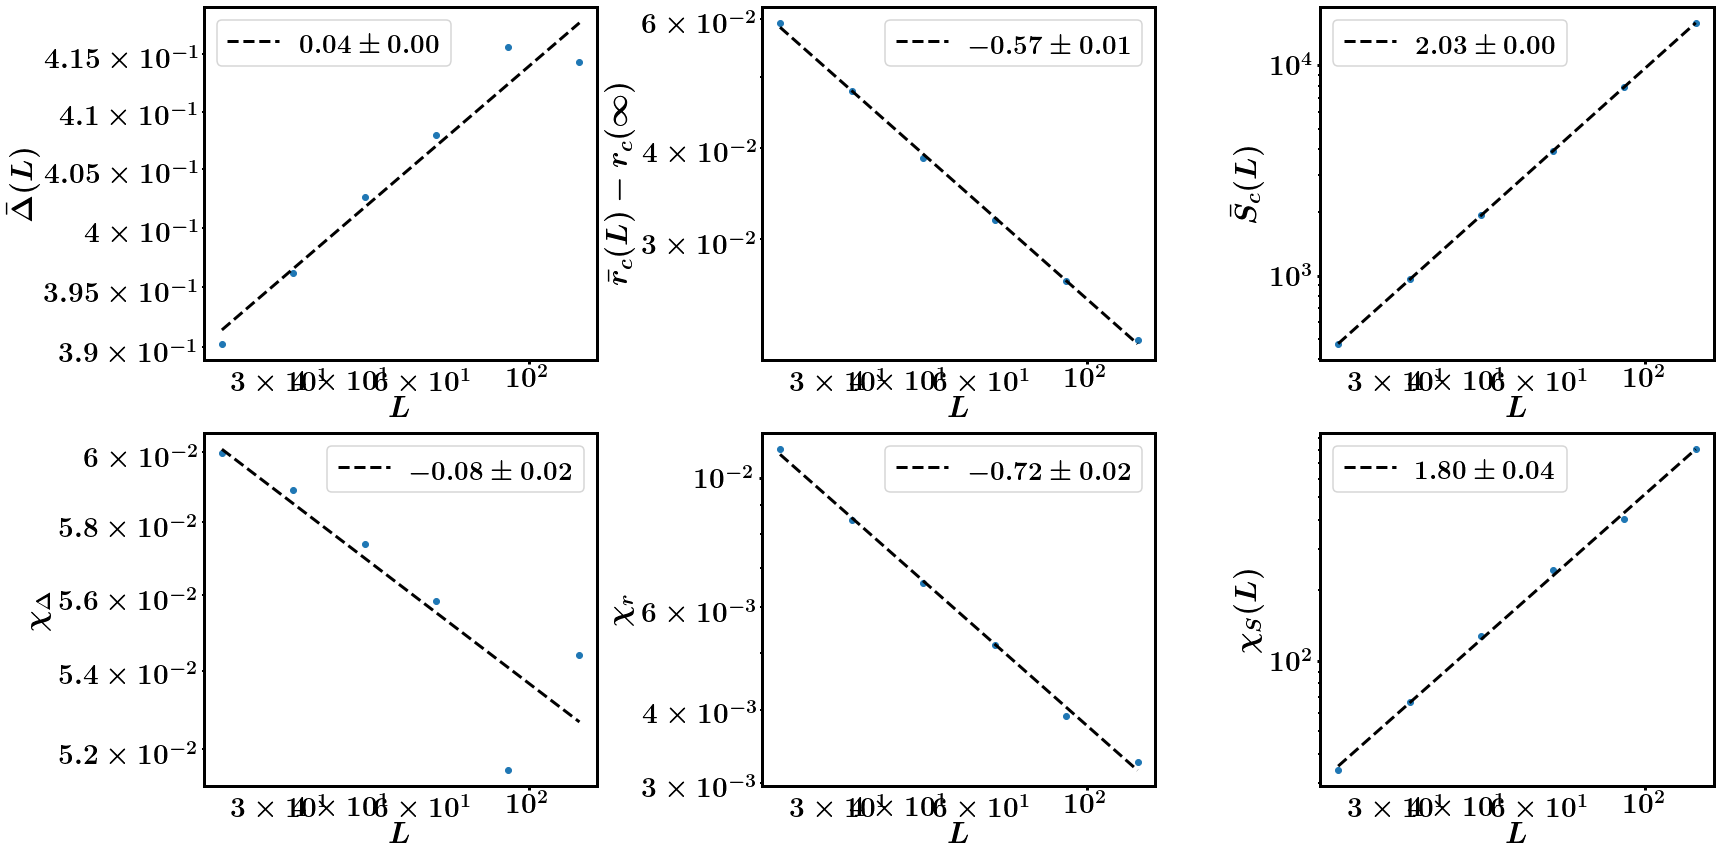

In [6]:
if net_type == 'Lattice':
    X = np.sqrt(sizes)
    str_size = 'L'
else:
    X = np.sqrt(sizes)
    str_size = 'L'
    

ncols = 3
nrows = 2
fig, axes = plt.subplots(figsize=(8*ncols, 6*nrows), ncols=ncols, nrows=nrows)

for ax in axes.flatten():
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel(r'${{{}}}$'.format(str_size))
    
ax = axes[0][0]
ax.set_ylabel(r'$\bar{\Delta}(L)$')
Y = all_mean_values[:,1]
Y_pred, slope, y_err = getLinearReg(X, Y)
ax.plot(X, Y, 'o')
ax.plot(X, Y_pred, '--', color='k', label=r'${{{:.2f}}}\pm{{{:.2f}}}$'.format(slope, y_err))

ax = axes[1,0]
ax.set_ylabel(r'$\chi_{\Delta}$')
Y = all_std_values[:,1]
Y_pred, slope, y_err = getLinearReg(X, Y)
beta_over_nu = -slope
ax.plot(X, Y, 'o')
ax.plot(X, Y_pred, '--', color='k', label=r'${{{:.2f}}}\pm{{{:.2f}}}$'.format(slope, y_err))

ax = axes[0,1]
ax.set_ylabel(r'$\bar{r}_c(L) - r_c(\infty)$')
rc = 0
if attack == 'Ran' and net_type == 'ER':
    rc = 1/3.5
Y = all_mean_values[:,0] - rc
Y_pred, slope, y_err = getLinearReg(X, Y)
nu = -1/slope
ax.plot(X, Y, 'o')
ax.plot(X, Y_pred, '--', color='k', label=r'${{{:.2f}}}\pm{{{:.2f}}}$'.format(slope, y_err))

ax = axes[1,1]
ax.set_ylabel(r'$\chi_{r}$')
Y = all_std_values[:,0]
Y_pred, slope, y_err = getLinearReg(X, Y)
nu_2 = -1/slope
ax.plot(X, Y, 'o')
ax.plot(X, Y_pred, '--', color='k', label=r'${{{:.2f}}}\pm{{{:.2f}}}$'.format(slope, y_err))


ax = axes[0,2]
ax.set_ylabel(r'$\bar{S}_c(L)$')
Y = all_mean_values[:,2]
Y_pred, slope, y_err = getLinearReg(X, Y)
d_f = slope
ax.plot(X, Y, 'o')
ax.plot(X, Y_pred, '--', color='k', label=r'${{{:.2f}}}\pm{{{:.2f}}}$'.format(slope, y_err))


ax = axes[1,2]
ax.set_ylabel(r'$\chi_{S}(L)$')
Y = all_std_values[:,2]
Y_pred, slope, y_err = getLinearReg(X, Y)
ax.plot(X, Y, 'o')
ax.plot(X, Y_pred, '--', color='k', label=r'${{{:.2f}}}\pm{{{:.2f}}}$'.format(slope, y_err))

for ax in axes.flatten():
    ax.legend()

plt.tight_layout()
fig_name = os.path.join(fig_dir, 'Fan2020_fig1_{}_{}'.format(net_type, attack))
plt.savefig(fig_name + '.png')
plt.savefig(fig_name + '.pdf')
plt.show()

### **Fig 2, Fan (2020)**

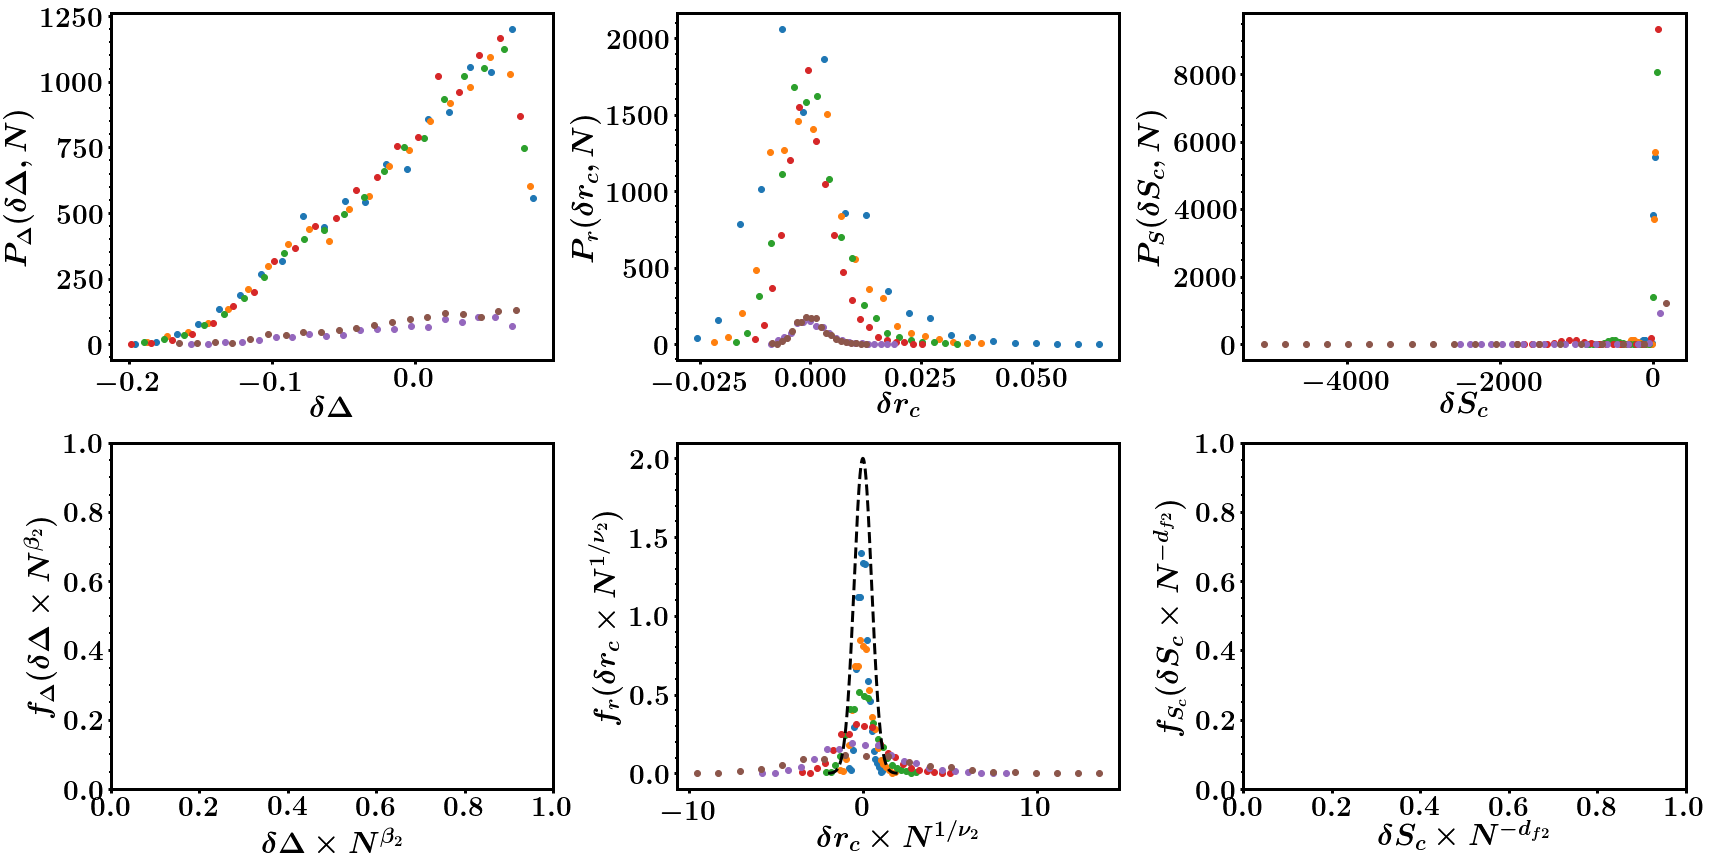

In [7]:
def f_r(z, zc, omega):
    return (1/omega) * np.exp(-(z-zc)**2/(2*omega**2))

if net_type == 'ER' and attack == 'Ran':
    rc = 1/3.5
    nu_2 = 3
    beta_2 = 1/3
    d_f2 = 2/3

bins = 20
ncols = 3
nrows = 2
fig, axes = plt.subplots(figsize=(8*ncols,6*nrows), ncols=ncols, nrows=nrows)

axes[0][0].set_xlabel(r'$\delta \Delta$')
axes[0][0].set_ylabel(r'$P_{\Delta}(\delta \Delta, N)$')
axes[1][0].set_xlabel(r'$\delta \Delta\times N^{\beta_2}$')
axes[1][0].set_ylabel(r'$f_{\Delta}(\delta \Delta \times N^{\beta_2})$')

axes[0][1].set_xlabel(r'$\delta r_c$')
axes[0][1].set_ylabel(r'$P_{r}(\delta r_c, N)$')
axes[1][1].set_xlabel(r'$\delta r_c\times N^{1/\nu_2}$')
axes[1][1].set_ylabel(r'$f_{r}(\delta r_c \times N^{1/\nu_2})$')

axes[0][2].set_xlabel(r'$\delta S_c$')
axes[0][2].set_ylabel(r'$P_{S}(\delta S_c, N)$')
axes[1][2].set_xlabel(r'$\delta S_c\times N^{-d_{f2}}$')
axes[1][2].set_ylabel(r'$f_{S_c}(\delta S_c \times N^{-d_{f2}})$')

index = [1, 0, 2]

for i, ax in enumerate(axes[0]):
    for size in sizes:
        freq, bin_edges = np.histogram(fluctuations[size][:,index[i]], bins=bins)
        bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2
        ax.plot(bin_centers, freq, 'o')
        

ax = axes[1][1]
for size in sizes:
    freq, bin_edges = np.histogram(
        fluctuations[N][:,0] * size**(1/nu_2), bins=bins, density=True
    )
    bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2
    #ax.plot(bin_centers * size**(1/nu_2), freq, 'o')
    ax.plot(bin_centers, freq, 'o')

        
ax = axes[1][1]
X = np.linspace(-2, 2, 10000)
#zc = rc * size**(1/nu)
omega = 0.5
F = lambda x: f_r(x, rc, omega)
ax.plot(X, F(X), '--', color='k')
        
plt.tight_layout()
fig_name = os.path.join(fig_dir, 'Fan2020_fig2_{}_{}'.format(net_type, attack))
plt.savefig(fig_name + '.png')
plt.savefig(fig_name + '.pdf')
plt.show()

In [4]:
sizes = [128, 256, 512, 1024, 2048, 4096, 8192, 16384]
rc_values, rc_values_std = get_rc_values(sizes)
#rc_values    

128
256
512
1024
2048
4096
8192
BtwU_cutoff6
BtwU_cutoff7
BtwU_cutoff8
BtwU_cutoff9
BtwU_cutoff10
BtwU_cutoff11
BtwU_cutoff12
BtwU_cutoff13
BtwU_cutoff14
BtwU_cutoff15
16384


In [24]:
l_cutoff = get_l_cutoff(0.01)
print(l_cutoff)

{128: 11, 256: 15, 512: 19, 1024: 25, 2048: 33, 4096: 42, 8192: 54, 16384: 72}


128
256
512
1024
2048
4096
8192
16384


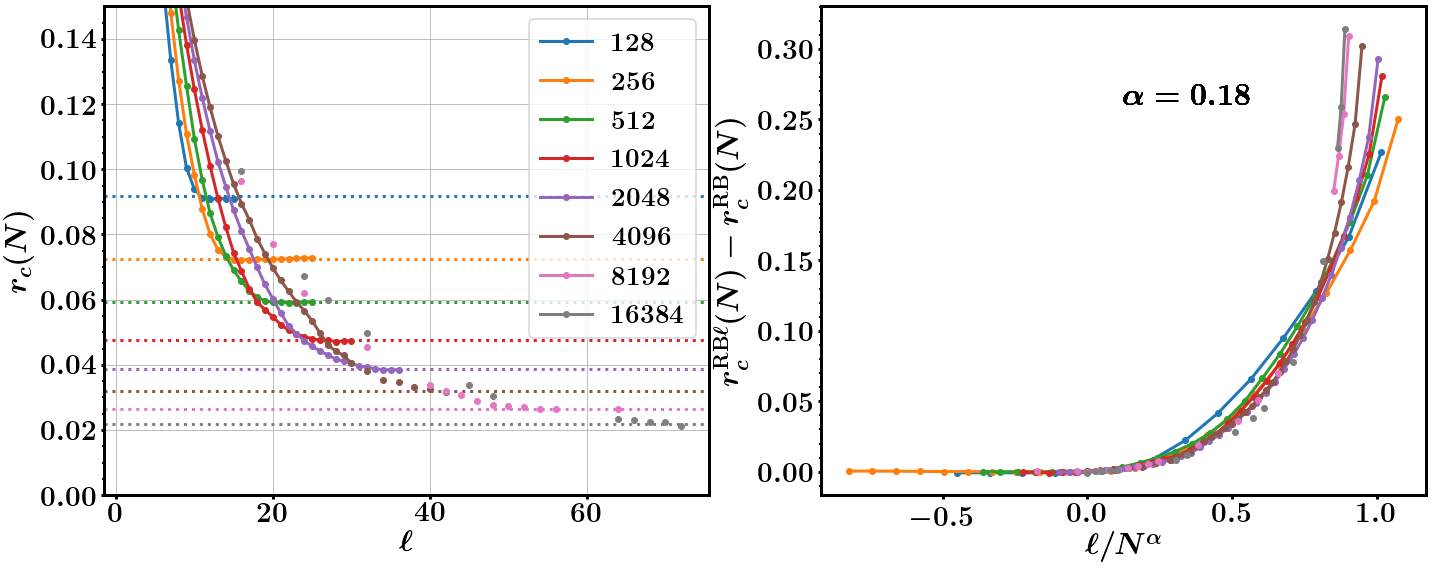

In [25]:
ncols = 2
nrows = 1
fig, axes = plt.subplots(figsize=(10*ncols,8*nrows), ncols=ncols, nrows=nrows)

ax = axes[0]
ax.grid(True)
ax.set_ylim(0, 0.15)
ax.set_xlabel(r'$\ell$')
ax.set_ylabel(r'$r_c(N)$')
for i, size in enumerate(sizes):    
    print(size)
    ax.plot(l_values, rc_values[size][1:], 'o-', 
        color=colors[i], label=r'${{{}}}$'.format(size)
    )
    #ax.errorbar(l_values, rc_values[size][1:], rc_values_std[size][1:], marker='o',# 'o-', 
    #    color=colors[i], label=r'${{{}}}$'.format(size)
    #)
    ax.axhline(rc_values[size][0], linestyle=':', color=colors[i])
ax.legend()

ax = axes[1]
ax.set_xlabel(r'$\ell/N^{\alpha}$')
ax.set_ylabel(r'$r_c^{\mathrm{RB}\ell}(N) - r_c^{\mathrm{RB}}(N)$')
#ax.set_yscale('log')
#ax.set_xscale('log')
for i, size in enumerate(sizes):

    e = 0.18
    ax.text(0.5, 0.8, r'$\alpha={{{:.2f}}}$'.format(e), fontsize=30, transform=ax.transAxes)
    #X = l_values / l_cutoff[size]
    X = (- l_values + l_cutoff[size])/size**0.45
    #X = l_values / size**e
    ax.plot(X, rc_values[size][1:]-rc_values[size][0], 'o-', 
        color=colors[i], label=r'${{{}}}$'.format(size)
    )
    
plt.tight_layout()
fig_name = os.path.join(fig_dir, 'peak_shifting_RBl_rc_{}'.format(net_type))
plt.savefig(fig_name + '.png')
plt.savefig(fig_name + '.pdf')

plt.tight_layout()
plt.show()

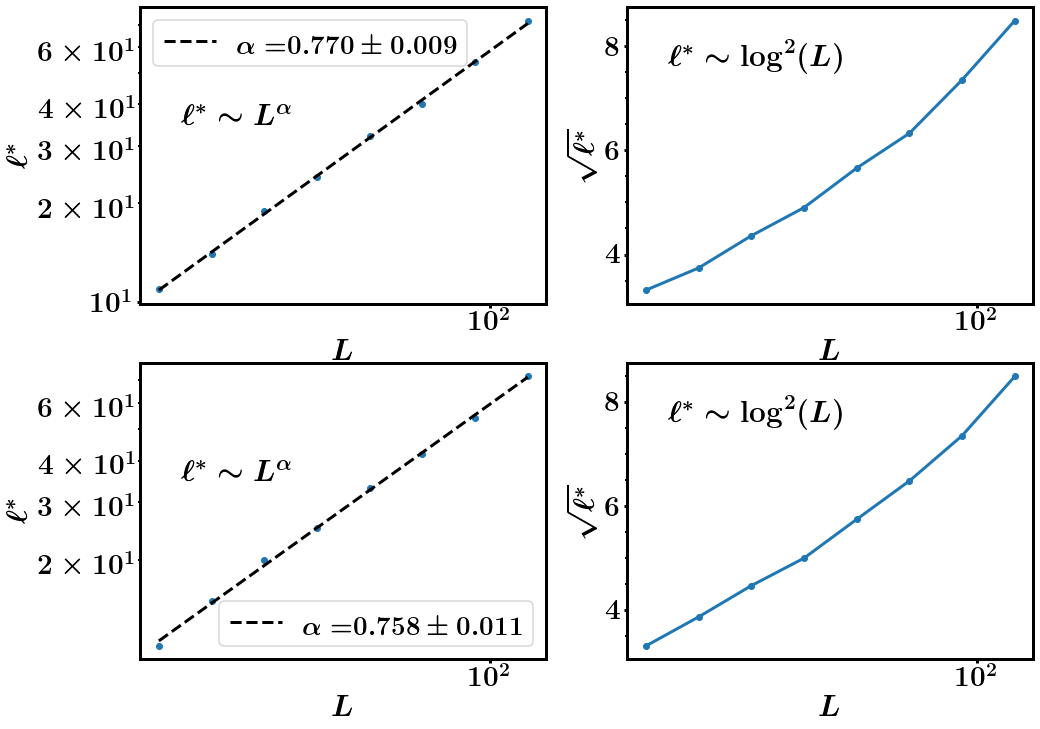

In [26]:
ncols = 2
nrows = 2
fig, axes = plt.subplots(figsize=(8*ncols,6*nrows), ncols=ncols, nrows=nrows)
thresholds = [0.02, 0.005]
for i, th in enumerate(thresholds):
    
    ax = axes[i][0]
    l_cutoff = get_l_cutoff(th)
    X = np.sqrt(list(l_cutoff.keys()))
    Y = np.array(list(l_cutoff.values()))
    ax.set_xlabel(r'$L$')
    ax.set_ylabel(r'$\ell^*$')
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.plot(X, Y, 'o')
    Y_pred, slope, y_err = getLinearReg(X, Y)
    label = r'$\alpha = $' + r'${{{:.3f}}}\pm{{{:.3f}}}$'.format(slope, y_err)
    ax.plot(X, Y_pred, '--', color='k', label=label)
    ax.text(0.1, 0.6, r'$\ell^* \sim L^{\alpha}$', fontsize=30, transform=ax.transAxes)
    ax.legend()
    
    ax = axes[i][1]
    l_cutoff = get_l_cutoff(th)
    X = np.sqrt(list(l_cutoff.keys()))
    Y = np.sqrt(list(l_cutoff.values()))
    ax.set_xlabel(r'$L$')
    ax.set_ylabel(r'$\sqrt{\ell^*}$')
    ax.set_xscale('log')
    #ax.set_yscale('log')
    ax.plot(X, Y, 'o-')

    ax.text(0.1, 0.8, r'$\ell^* \sim \log^2 (L)$', fontsize=30, transform=ax.transAxes)

plt.show()

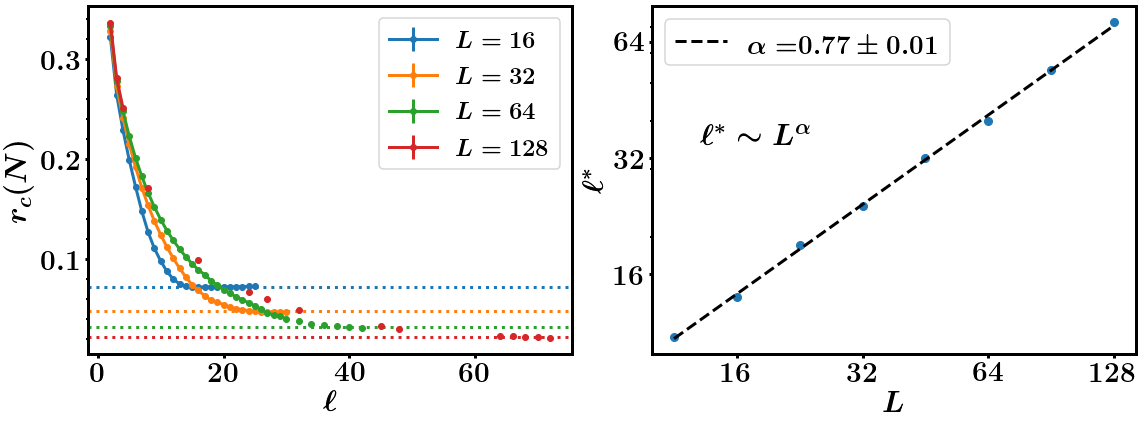

In [20]:
ncols = 2
nrows = 1
fig, axes = plt.subplots(figsize=(8*ncols,6*nrows), ncols=ncols, nrows=nrows)

ax = axes[0]
#ax.grid(True)
#ax.set_ylim(0, 0.15)
ax.set_xlabel(r'$\ell$')
ax.set_ylabel(r'$r_c(N)$')
for i, size in enumerate([256, 1024, 4096, 16384]): 
    ax.errorbar(l_values, rc_values[size][1:], rc_values_std[size][1:], marker='o',# 'o-', 
        color=colors[i], label=r'$L={{{}}}$'.format(int(np.sqrt(size)))
    )
    ax.axhline(rc_values[size][0], linestyle=':', color=colors[i])
ax.legend(fontsize=24)

ax = axes[1]
l_cutoff = get_l_cutoff(0.02)
X = np.sqrt(list(l_cutoff.keys()))
Y = np.array(list(l_cutoff.values()))
ax.set_xlabel(r'$L$')
ax.set_ylabel(r'$\ell^*$')
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(X, Y, 'o', markersize=8)
Y_pred, slope, y_err = getLinearReg(X, Y)
label = r'$\alpha = $' + r'${{{:.2f}}}\pm{{{:.2f}}}$'.format(slope, y_err)
ax.plot(X, Y_pred, '--', color='k', label=label)
ax.text(0.1, 0.6, r'$\ell^* \sim L^{\alpha}$', fontsize=30, transform=ax.transAxes)

#ax.set_xlim(12, 128)
ax.set_xticks([16, 32, 64, 128])
ax.get_xaxis().set_minor_formatter(mpl.ticker.NullFormatter())
ax.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())

ax.set_yticks([16, 32, 64])
ax.get_yaxis().set_minor_formatter(mpl.ticker.NullFormatter())
ax.get_yaxis().set_major_formatter(mpl.ticker.ScalarFormatter())

ax.legend()
    
plt.tight_layout()
fig_name = os.path.join(fig_dir, 'peak_shifting_RBl_rc_{}'.format(net_type))
plt.savefig(fig_name + '.png')
plt.savefig(fig_name + '.pdf')

plt.tight_layout()
plt.show()

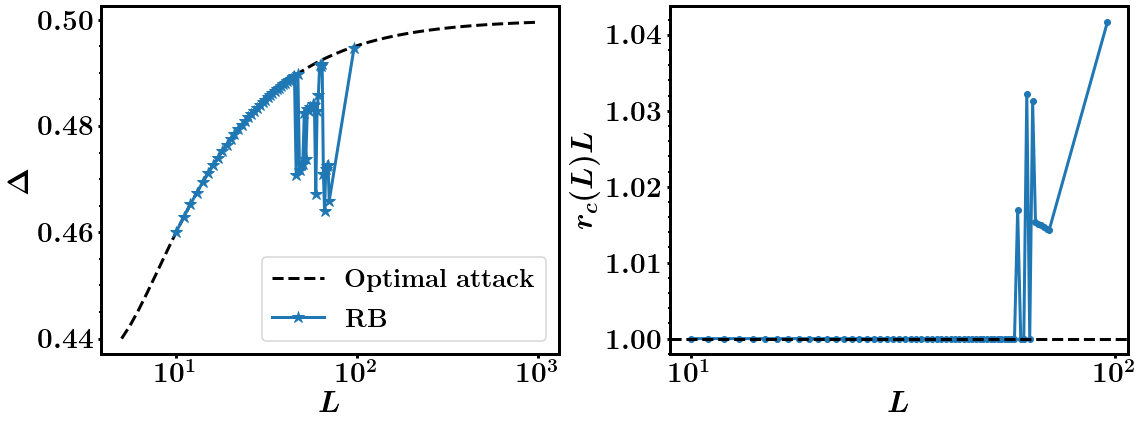

In [62]:
def delta_lattice(L, d=2):
    return 1/2 - 1/(2*L) + 1/L**d

def delta_lattice2(L, d=2):
    return 1/2 - 1/(2*L) - np.sqrt(2)/L + 1/L**d

def delta_DT(L, alpha=0):
    return ((L**2 - alpha*L)/2 + 1) / (L*L)

def fc_optim(L):
    return

def get_dim(network):
    if network == 'Lattice':
        return 2
    if network == 'Ld3':
        return 3

network = 'Lattice'


L_values = np.array(list(range(10, 71)) + [96])
fcN_values = []
norm_mean_delta_values_lattice = []
for L in L_values:
    norm_mean_delta = load_delta(network, L, param, attack, 1)[1]
    fcN = load_delta(network, L, param, attack, 1)[0] + 1/(L*L)
    norm_mean_delta_values_lattice.append(norm_mean_delta)
    fcN_values.append(fcN)

fcN_values = np.array(fcN_values)

linestyles = ['--', '-.']
X = np.logspace(np.log10(5), 3)
ncols = 2
nrows = 1
fig, axes = plt.subplots(figsize=(8*ncols, 6*nrows), ncols=ncols, nrows=nrows)

dim = get_dim(network)

ax = axes[0]

ax.set_xlabel(r'$L$')
ax.set_ylabel(r'$\Delta$')
ax.set_xscale('log')
#ax.set_yscale('log')
ax.plot(
    X**(dim-1), delta_lattice(X, d=dim), linestyles[0], color='k', 
    label=r'$\mathrm{Optimal\;attack}$'
)
ax.plot(L_values**(dim-1), norm_mean_delta_values_lattice, '*-', 
        markersize=12, label=attack_dict[attack])
ax.legend()

ax = axes[1]
ax.set_xscale('log')
ax.set_xlabel(r'$L$')
ax.set_ylabel(r'$r_c(L) L$')
ax.plot(L_values**(dim-1), fcN_values*L_values, 'o-')
ax.axhline(1, linestyle='--', label=r'$\mathrm{Optimal\;attack}$', color='k')

plt.tight_layout()

fig_name = os.path.join(fig_dir, 'Delta_and_fcL_Lattice')
plt.savefig(fig_name + '.png')
plt.savefig(fig_name + '.pdf')
plt.show()

512
1024


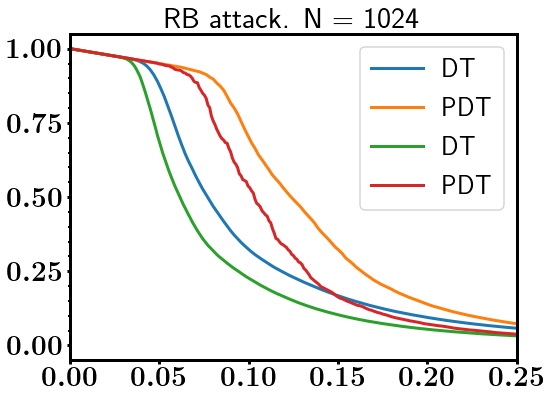

In [61]:
param = 'param'
attack = 'BtwU'

sizes = [512, 1024]
networks = ['DT', 'PDT']
dfs = {net_type: {} for net_type in networks}

for size in sizes:
    for net_type in networks:
        df = load_dataframe(net_type, size, param, attack)
        dfs[net_type][size] = df
        
size = sizes[-1]
        
fig, ax = plt.subplots(figsize=(8, 6))

ax.set_title('RB attack. N = {}'.format(size), fontsize=30)
ax.set_xlim(0, 0.25)
for size in sizes:
    print(size)
    for net_type in networks:
        df = dfs[net_type][size]
        ax.plot(df.f, df.Sgcc, label=net_type)

ax.legend(loc='best')
plt.show()

1024
2048
4096
8192


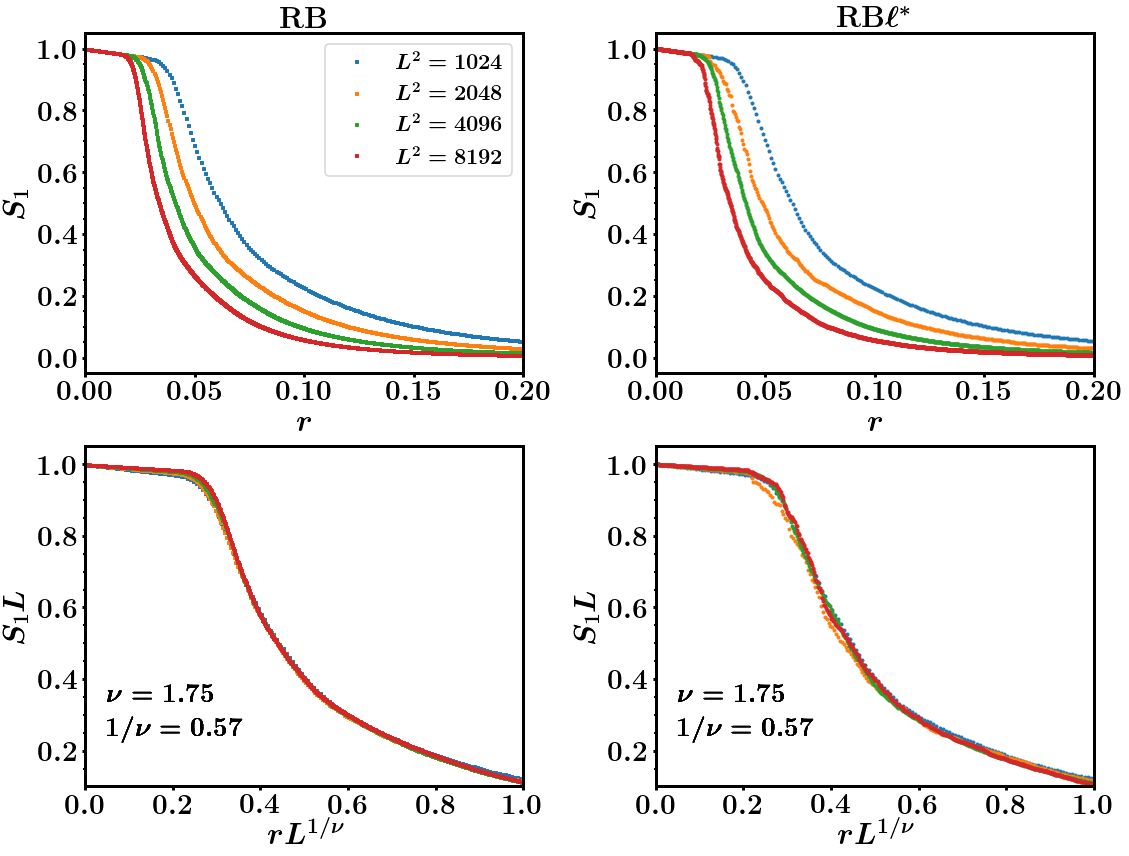

In [27]:
ncols = 2
nrows = 2
fig, axes = plt.subplots(figsize=(8*ncols, 6*nrows), ncols=ncols, nrows=nrows)

for i in range(2):
    ax = axes[0,i]
    ax.set_xlim(0, 0.2)
    ax.set_xlabel(r'$r$')
    ax.set_ylabel(r'$S_1$')
for i in range(2):
    ax = axes[1,i]
    ax.set_xlim(0, 1)
    ax.set_ylim(0.1, 1.05)
    ax.set_ylabel(r'$S_1 L$')
    ax.set_xlabel(r'$r L^{1/\nu}$')
    
axes[0,0].set_title(r'$\mathrm{RB}$', fontsize=30)
axes[0,1].set_title(r'$\mathrm{RB}\ell^*$', fontsize=30)
    
for N in [1024, 2048, 4096, 8192]:
    print(N)
    L = np.sqrt(N)
    l = l_cutoff = get_l_cutoff(0.02)[N]
    for i, attack in enumerate(['BtwU', 'BtwU_cutoff{}'.format(l)]):

        df = load_dataframe(net_type, N, param, attack)
        ax = axes[0,i]
        ax.plot(df.f, df.Sgcc, linestyle='', marker=markers[i], markersize=3,
                label=r'$L^2 = {{{}}}$'.format(N))#, color='k')
        ax = axes[1,i]
        #one_over_nu = 5/9
        one_over_nu = 0.57
        nu = 1 / one_over_nu
        ax.plot(df.f*L**one_over_nu, df.Sgcc, linestyle='', marker=markers[i], markersize=3,
            label=r'${{{}}}$'.format(N))#, color='k')
        ax.text(0.05, 0.25, r'$\nu = {{{:.2f}}}$'.format(nu), 
                transform=ax.transAxes, fontsize=26)
        ax.text(0.05, 0.15, r'$1/\nu = {{{:.2f}}}$'.format(one_over_nu), 
                transform=ax.transAxes, fontsize=26)

axes[0,0].legend(fontsize=22)
plt.tight_layout()
fig_name = os.path.join(fig_dir, 'Sgcc_scaling_RB_{}'.format(net_type))
plt.savefig(fig_name + '.png')
plt.savefig(fig_name + '.pdf')
plt.show()

1024
2048
4096
8192


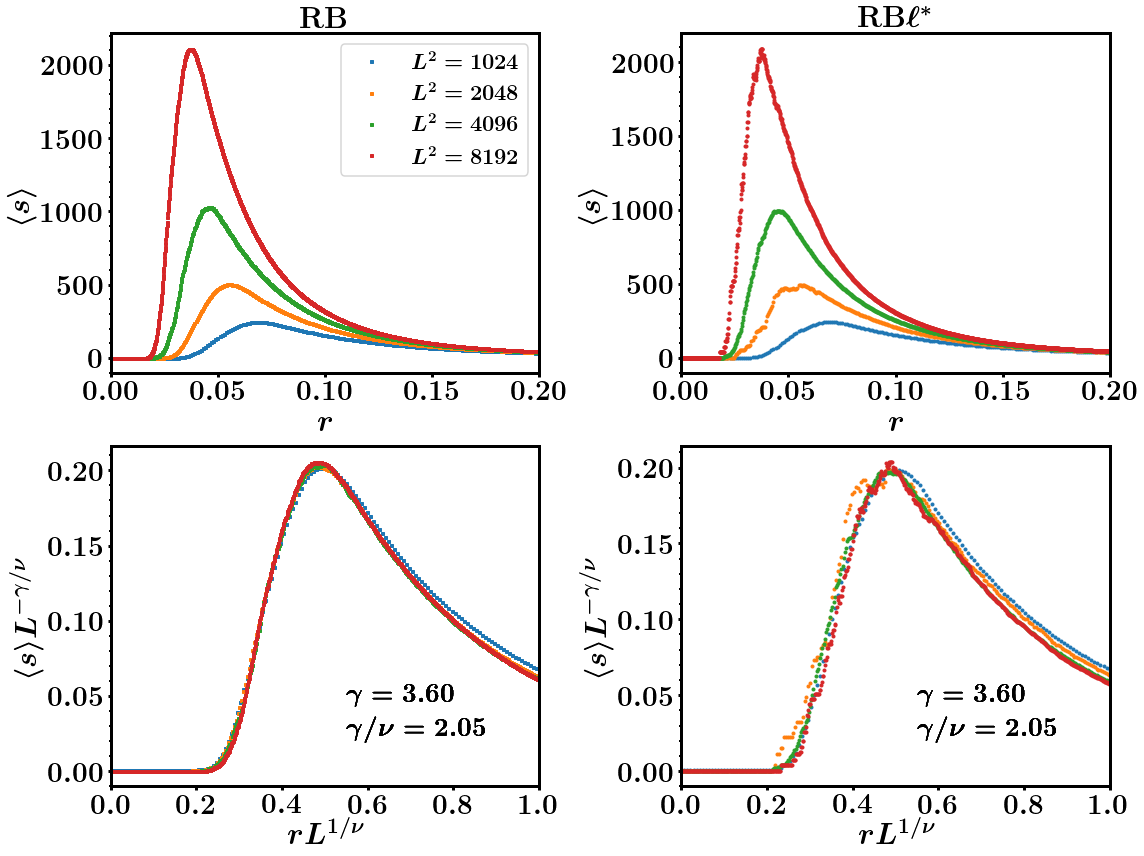

In [28]:
ncols = 2
nrows = 2
fig, axes = plt.subplots(figsize=(8*ncols, 6*nrows), ncols=ncols, nrows=nrows)

for i in range(2):
    ax = axes[0,i]
    ax.set_xlim(0, 0.2)
    ax.set_xlabel(r'$r$')
    ax.set_ylabel(r'$\langle s\rangle$')
for i in range(2):
    ax = axes[1,i]
    ax.set_xlim(0, 1)
    #ax.set_ylim(0.1, 1.05)
    ax.set_ylabel(r'$\langle s\rangle L^{-\gamma/\nu}$')
    ax.set_xlabel(r'$r L^{1/\nu}$')
    
axes[0,0].set_title(r'$\mathrm{RB}$', fontsize=30)
axes[0,1].set_title(r'$\mathrm{RB}\ell^*$', fontsize=30)
    
for N in [1024, 2048, 4096, 8192]:
    print(N)
    L = np.sqrt(N)
    l = l_cutoff = get_l_cutoff(0.02)[N]
    for i, attack in enumerate(['BtwU', 'BtwU_cutoff{}'.format(l)]):

        df = load_dataframe(net_type, N, param, attack)
        ax = axes[0,i]
        ax.plot(df.f, df.meanS, linestyle='', marker=markers[i], markersize=3,
                label=r'$L^2 = {{{}}}$'.format(N))#, color='k')
        ax = axes[1,i]
        #one_over_nu = 5/9
        one_over_nu = 0.57
        nu = 1 / one_over_nu
        gamma_over_nu = 2.05
        gamma = gamma_over_nu * nu
        ax.plot(
            df.f*L**one_over_nu, df.meanS*L**(-gamma_over_nu), linestyle='', 
            marker=markers[i], markersize=3,
            label=r'${{{}}}$'.format(N)
        )#, color='k')
        ax.text(0.55, 0.25, r'$\gamma = {{{:.2f}}}$'.format(gamma), 
                transform=ax.transAxes, fontsize=26)
        ax.text(0.55, 0.15, r'$\gamma/\nu = {{{:.2f}}}$'.format(gamma_over_nu), 
                transform=ax.transAxes, fontsize=26)

axes[0,0].legend(fontsize=22)
plt.tight_layout()
fig_name = os.path.join(fig_dir, 'meanS_scaling_RB_{}'.format(net_type))
plt.savefig(fig_name + '.png')
plt.savefig(fig_name + '.pdf')
plt.show()

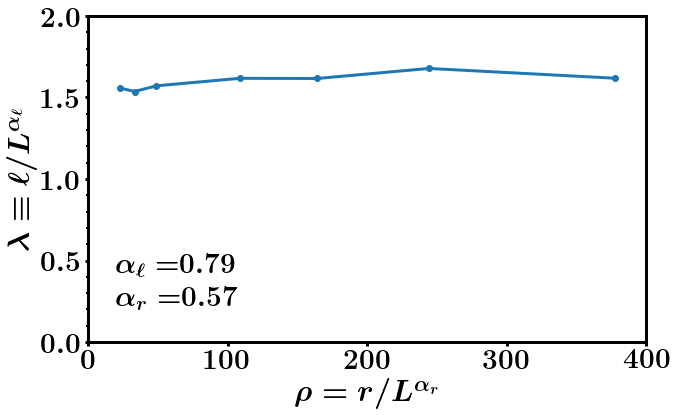

In [78]:
fig, ax = plt.subplots(figsize=(10,6))
#ax.set_xlabel(r'$N_r/L$')
ax.set_xlabel(r'$\rho = r/L^{\alpha_r}$')
ax.set_ylabel(r'$\lambda \equiv \ell/L^{\alpha_{\ell}}$')
#ax.set_xscale('log')
#ax.set_yscale('log')

_sizes = [128, 256, 512, 1024, 4096, 8192, 16384]

#X = [rc_values[size][0]*np.sqrt(size) for size in _sizes]

alpha_r = 0.57
alpha_l = 0.79

X = [rc_values[size][0]*N/np.sqrt(size)**alpha_r for size in _sizes]
Y = [l_cutoff[size]/np.sqrt(size)**alpha_l for size in _sizes]
ax.plot(X, Y, 'o-')
ax.set_ylim(0, 2)
ax.set_xlim(0, 400)
ax.text(0.05, 0.2, r'$\alpha_{\ell} =$' + r'$ {{{:.2f}}}$'.format(alpha_l), fontsize=28, transform=ax.transAxes)
ax.text(0.05, 0.1, r'$\alpha_{r} =$' + r'$ {{{:.2f}}}$'.format(alpha_r), fontsize=28, transform=ax.transAxes)
#for i in range(10):
#    X2 = [rc_values[size][i] for size in _sizes]
#    ax.plot(X2, Y, 'o-')
    
fig_name = os.path.join(fig_dir, 'phase_diagram_{}'.format(net_type))
plt.savefig(fig_name + '.png')
plt.savefig(fig_name + '.pdf')
plt.show()

In [23]:
sizes = [128, 256, 512, 1024, 2048, 4096, 8192]
f_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]    
l_values = range(2, 100)
Sgcc_values = {}
for size in sizes:
    print(size)
    Sgcc_values[size] = {}
    for f in f_values:
        if f in Sgcc_values[size]:
            continue
        Sgcc_values[size][f] = []
        attacks = ['BtwU_cutoff{}'.format(l) for l in l_values]
        for i, attack in enumerate(attacks):

            try:
                df = load_dataframe(net_type, size, param, attack)
            except FileNotFoundError:
                Sgcc_values[size][f].append(np.NaN)
                continue

            k = 0

            while df.f[k] < f:
                k += 1

            Sgcc_values[size][f].append(df.Sgcc[k])

128
256
512
1024
2048
4096
8192


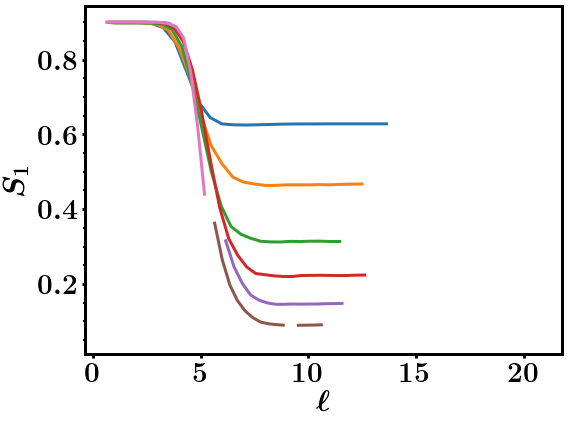

In [40]:
_f_values = [0.1]
ncols = len(_f_values)
nrows = 1
fig, axes = plt.subplots(figsize=(8*ncols, 6*nrows), ncols=ncols, nrows=nrows)
    
axes = np.array([axes])
for ax in axes:
    ax.set_xlabel(r'$\ell$')
    ax.set_ylabel(r'$S_1$')

for m, f in enumerate(_f_values):
    ax = axes[m]
    for j, size in enumerate(sizes):
        L = np.sqrt(size)
        X = np.array(l_values) / L**0.25
        Y = np.array(Sgcc_values[size][f]) 
        #ax.plot(X, [y*x for x, y in zip(X, Y)])
        ax.plot(X, Y)
        
plt.tight_layout()
plt.show()